In [1]:
#Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df



In [2]:
from sklearn.datasets import load_breast_cancer
data_sk = load_breast_cancer()
data_sk.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(data_sk.target)
print(data_sk.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [4]:
data_DT = sklearn_to_df(data_sk)
data_SVM = data.copy()

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
import matplotlib.pyplot as plt

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
M = data[(data['target'] != 0)].copy()
B = data[(data['target'] == 0)].copy()

In [9]:
M.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,0.0
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,0.0
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,0.0
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,0.0
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,0.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,0.0


In [10]:
B.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,1.0
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,0.0
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,1.0
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,1.0
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,1.0
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,1.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,1.0


In [11]:
malignant = M.drop(columns=['target'])
benign = B.drop(columns=['target'])
malignant_mean = malignant.mean()
benign_mean = benign.mean()
analysis_point = (malignant_mean+benign_mean)/2

analysis_point_df = (pd.DataFrame(analysis_point)).T
analysis_point_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486


In [12]:
M.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df_mean = data[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension','target']]

df_error = data[['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error','target']]

df_worst = data [['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target']]

In [14]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           569 non-null    float64
 9   mean fractal dimension  569 non-null    float64
 10  target                  569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


In [15]:
# recast into long format 
df_mean_plot = df_mean.melt(['target'], var_name='cols',  value_name='vals')
df_error_plot = df_error.melt(['target'], var_name='cols',  value_name='vals')
df_worst_plot = df_worst.melt(['target'], var_name='cols',  value_name='vals')

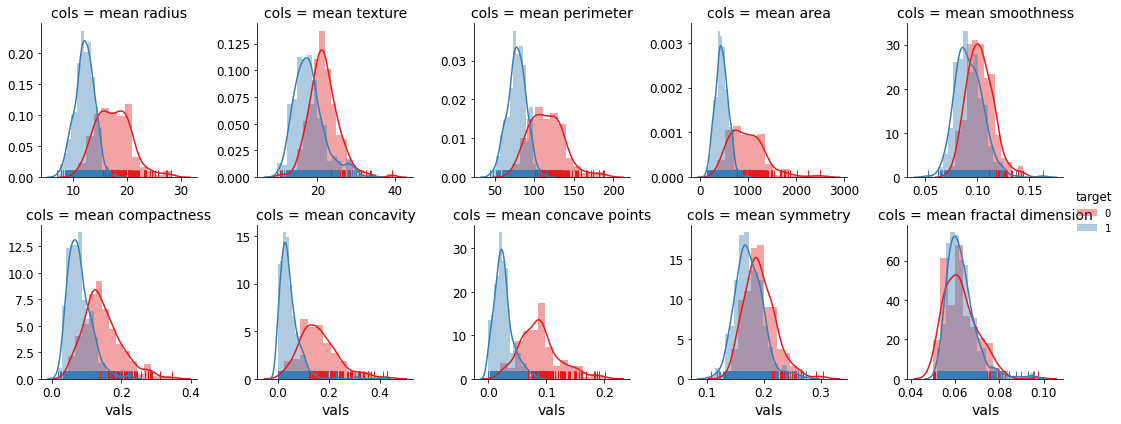

In [16]:
g_mean = sns.FacetGrid(df_mean_plot, col='cols', hue="target", palette="Set1",
                       sharex=False, sharey=False, col_wrap=5)
g_mean = (g_mean.map(sns.distplot, "vals", hist=True, rug=True))
g_mean.add_legend()
#g_mean.add_legend(title='Smoker', labels=['Hell Yeh', 'Nah Bruh'])
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])

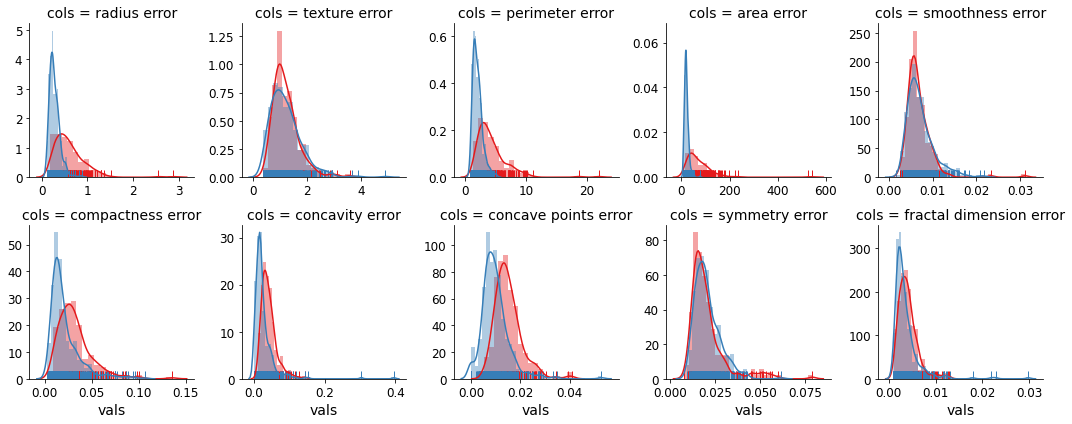

In [17]:
g_error = sns.FacetGrid(df_error_plot, col='cols', hue="target", palette="Set1",
                       sharex=False, sharey=False, col_wrap=5)
g_error = (g_error.map(sns.distplot, "vals", hist=True, rug=True))

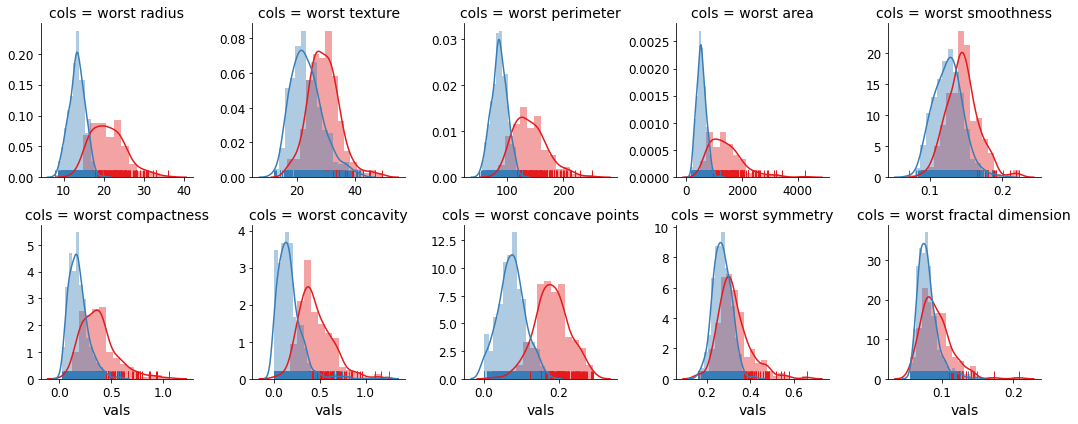

In [18]:
g_worst = sns.FacetGrid(df_worst_plot, col='cols', hue="target", palette="Set1",
                       sharex=False, sharey=False, col_wrap=5)
g_worst = (g_worst.map(sns.distplot, "vals", hist=True, rug=True))

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df_mean["target"], df_mean["mean radius"], pos_label= 0)

In [20]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1.1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)  
    plt.legend()
    plt.grid(True)                                            

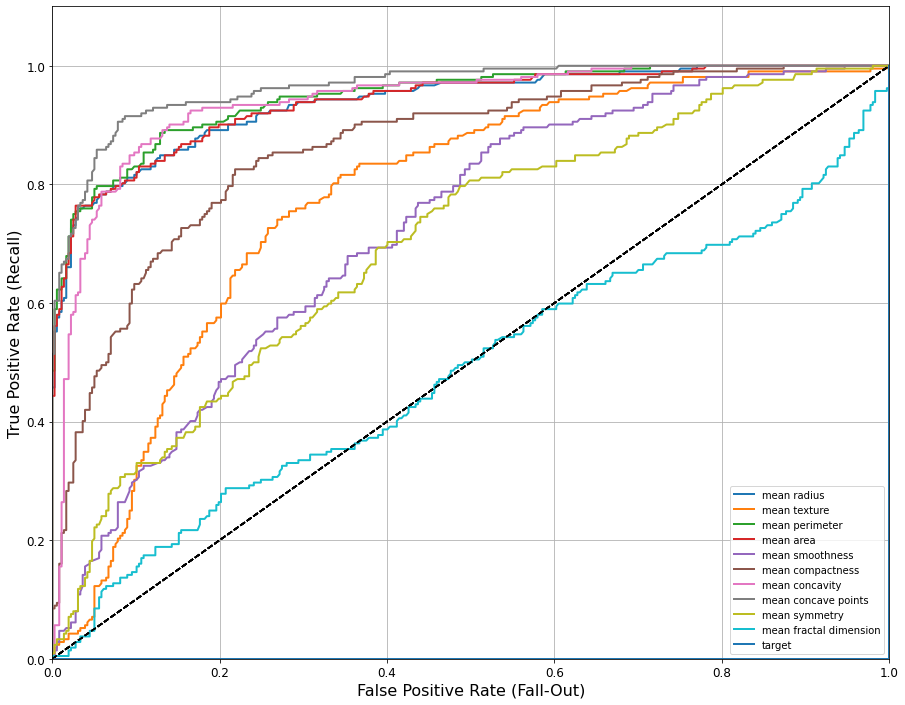

In [21]:
fig, ax = plt.subplots(figsize=(15,12))
for i in df_mean:
    fpr, tpr, thresholds = roc_curve(df_mean["target"], df_mean[i], pos_label= 0)
    plot_roc_curve(fpr, tpr, str(i))


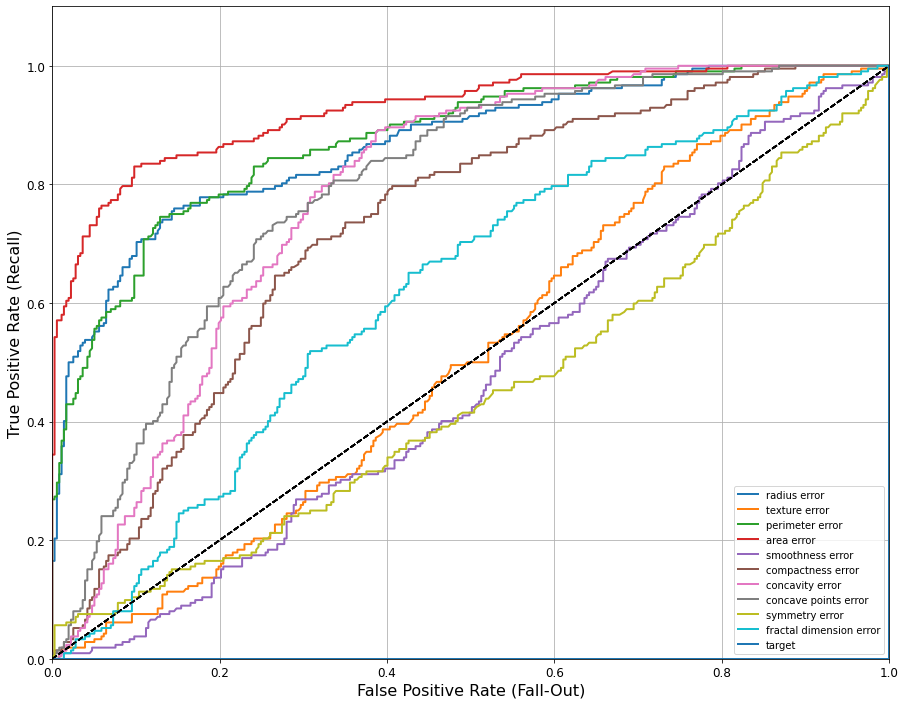

In [22]:
fig, ax = plt.subplots(figsize=(15,12))
for i in df_error:
    fpr, tpr, thresholds = roc_curve(df_error["target"], df_error[i], pos_label= 0)
    plot_roc_curve(fpr, tpr, str(i))


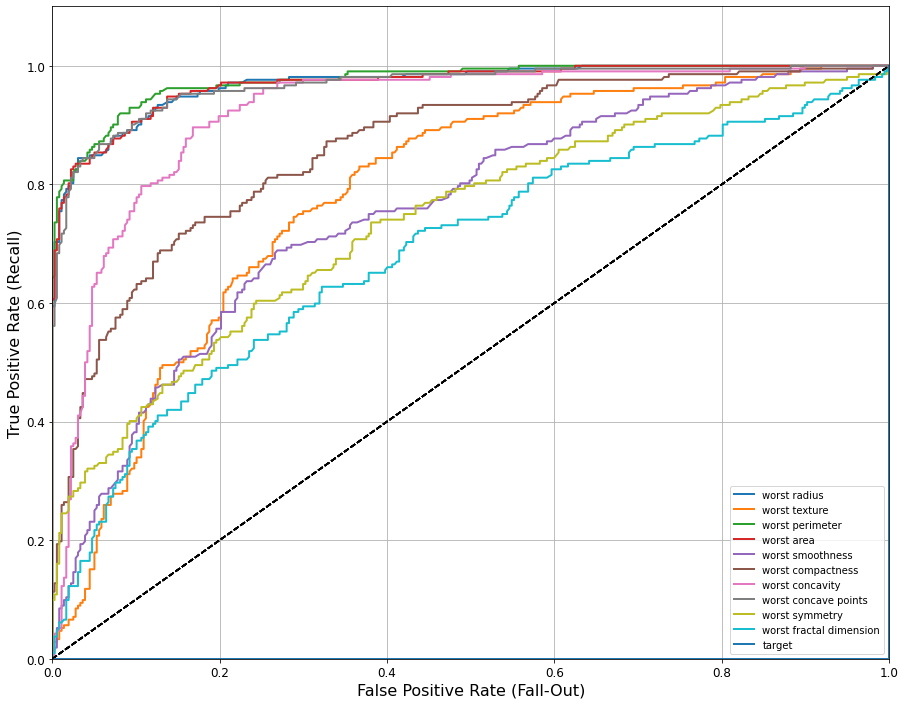

In [23]:
fig, ax = plt.subplots(figsize=(15,12))
for i in df_worst:
    fpr, tpr, thresholds = roc_curve(df_worst["target"], df_worst[i], pos_label= 0)
    plot_roc_curve(fpr, tpr, str(i))


In [24]:
# M1 = M.drop(columns="target")
# a = M1.mean(axis=0)
# b = a.mean()
# print(b)

In [25]:
# B1 = B.drop(columns="target")
# a1 = B1.mean(axis=0)
# b1 = a1.mean()
# print(b1)

In [26]:
# median_point = (b+b1)/2
# print(median_point)
#68.46685219247513


In [27]:
X = data.drop(columns = "target")
y = data["target"]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = [
    # try 18 (3×6) combinations of hyperparameters
    {'max_depth': [1,2, 4, 5, 6, 7, 8,9,10], 'min_samples_leaf': [1 ,2, 4, 6,7,8,9,10,11,12]}]

DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0
                                      ,class_weight="balanced")

# train across 10 folds, that's a total of (18+18)*10=360 rounds of training 
grid_search = GridSearchCV(DecisionTree, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 4, 5, 6, 7, 8, 9, 10],
        

In [31]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [32]:
#grid_search.feature_importances_

In [33]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)

In [34]:
#clf.shape

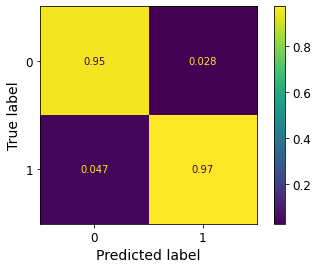

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, normalize="pred")

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=data_sk.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        43
      benign       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [37]:
# from IPython.display import Image
# from sklearn import tree

# import pydotplus
# # Create DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=data_sk.feature_names,  
#                                 class_names=data_sk.target_names)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())


In [38]:
for i, t in zip(X_train.columns, clf.feature_importances_):
    print(i,t)
    

mean radius 0.0
mean texture 0.028199712724440284
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.7431213851807796
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.014567183160828633
texture error 0.0
perimeter error 0.0
area error 0.0
smoothness error 0.0
compactness error 0.0
concavity error 0.0011935306379370389
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.08027471475416907
worst texture 0.0554225503324173
worst perimeter 0.07313670164128795
worst area 0.0
worst smoothness 0.0
worst compactness 0.0
worst concavity 0.004084221568140033
worst concave points 0.0
worst symmetry 0.0
worst fractal dimension 0.0


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error         

In [40]:
ap_df_t = analysis_point_df
ap_df = pd.concat([ap_df_t]*455,ignore_index=True)

# X_train_plot = X_train.copy()
# subset_cols = ['worst perimeter', 'mean concave points']  
# for col in ap_df.columns:
#     a = ap_df[col]
#     #print(type(a))
#     #print(type(col))
#     if col != 'worst perimeter' and col != "mean concave points":
#         X_train_plot[col]= a
ap_df.head(-1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
1,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
2,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
3,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
4,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
450,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
451,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486
452,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486


In [41]:
# X_train_plot.head(-1)

In [42]:
# a = (X_train_plot["mean radius"]).to_numpy()
# a = np.meshgrid(np.arange(15, 90, 0.5))
# b = a[0]
# type(b)
# len(b)
# for c, x in  zip(range(150),b):
#     b[c] = 0
# v1 = list(range(0,150))
# print(v1)

In [43]:
# def make_meshgrid1(df, h=.02):
#     """Create a mesh of points to plot in

#     Parameters
#     ----------
#     x: data to base x-axis meshgrid on
#     y: data to base y-axis meshgrid on
#     h: stepsize for meshgrid, optional

#     Returns
#     -------
#     xx, yy : ndarray
#     """
#     df1 = pd.DataFrame(columns = df.columns)
#     for col in df.columns:
#         col_min, col_max = df[col].min()-1, df[col].max()+1
#         a = np.meshgrid(np.arange(col_min, col_max, h))
#         b = a[0]
#         for i in b:
#             df1 = df1.append({col : i }, ignore_index=True)
            
#     return df1

In [44]:
# def make_meshgrid2(df, h):
#     """Create a mesh of points to plot in

#     Parameters
#     ----------
#     x: data to base x-axis meshgrid on
#     y: data to base y-axis meshgrid on
#     h: stepsize for meshgrid, optional

#     Returns
#     -------
#     xx, yy : ndarray
#     """
#     df1 = pd.DataFrame(columns = df.columns)
#     x_min, x_max = df['worst perimeter'].min() - 1, df['worst perimeter'].max() + 1
#     y_min, y_max = df['mean concave points'].min() - 1, df['mean concave points'].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     a = xx.ravel()
#     b = yy.ravel()
#     df1 ["mean texture"] = b
#     for col in df.columns:
#         if col == 'worst perimeter':
#             for i, a in zip(list(range(0,len(a))) , a):
#                 df1.at[i, col]= a
                
#         if col == 'mean concave points':  
#             for i, b in zip(list(range(0,len(b))) , b):
#                 df1.at[i, col]= b
#                 #df1 = df1.append({col : c }, ignore_index=False)
#         if col != 'mean concave points' and col != "worst perimeter":
#             df1[col] = median_point
        
    
#     return df1

In [45]:
# df1 = pd.DataFrame(columns = X_train_plot.columns)
# x_min, x_max = X_train_plot['mean texture'].min() - 1, X_train_plot['mean texture'].max() + 1
# y_min, y_max = X_train_plot['worst perimeter'].min() - 1, X_train_plot['worst perimeter'].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max,0.5),
#                          np.arange(y_min, y_max, 0.5))
# a = xx.ravel()
# b = yy.ravel()
# #for col in X_train_plot.columns:
#     #if col == 'mean texture':
#      #   for i, a in zip(list(range(0,len(a))) , a):
#       #      df1.at[i, col]=a
#  #   if col == 'worst perimeter':  
#   #      for i1, b1 in zip(list(range(0,len(b))) , b):
#    #         df1.at[i1, col]=b1
            
# print(len(b))
# print(len(a))

In [46]:
# X_train_plot_ready = make_meshgrid2(X_train_plot, 0.1)

In [47]:
# X_train_plot_ready.head(-1)

In [48]:
# print(xx.ravel())

In [49]:
# x_min, x_max = X_train_plot['worst texture'].min() - 1, X_train_plot['worst texture'].max() + 1
# y_min, y_max = X_train_plot['mean concave points'].min() - 1, X_train_plot['mean concave points'].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                          np.arange(y_min, y_max, 0.1))


In [50]:
# def plot_contours(ax, clf, df, **params):
#     """Plot the decision boundaries for a classifier.

#     Parameters
#     ----------
#     ax: matplotlib axes object
#     clf: a classifier
#     xx: meshgrid ndarray
#     yy: meshgrid ndarray
#     params: dictionary of params to pass to contourf, optional
#     """
#     x_min, x_max = X_train_plot['mean texture'].min() - 1, X_train_plot['mean texture'].max() + 1
#     y_min, y_max = X_train_plot['worst perimeter'].min() - 1, X_train_plot['worst perimeter'].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
#                          np.arange(y_min, y_max, 0.5))
#     a = xx.ravel()
#     b = yy.ravel()
#     Z = clf.predict(df)
    
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

In [51]:
# X0 = (X_train_plot['worst perimeter'])
# X1 =(X_train_plot['mean concave points'])
# print(X0)

In [52]:
# x_min, x_max = X_train_plot['worst perimeter'].min() - 1, X_train_plot['worst perimeter'].max() + 1
# y_min, y_max = X_train_plot['mean concave points'].min() - 1, X_train_plot['mean concave points'].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                          np.arange(y_min, y_max, 0.1))
# a = xx.ravel()
# b = yy.ravel()
# Z = clf.predict(X_train_plot_ready)    
# Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
# plt.scatter(X0, X1, c=y_train, s=10, cmap=plt.cm.coolwarm,  edgecolors='k')

In [53]:
for i, t in zip(X_train.columns, clf.feature_importances_):
    print(i,t)
    

mean radius 0.0
mean texture 0.028199712724440284
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.7431213851807796
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.014567183160828633
texture error 0.0
perimeter error 0.0
area error 0.0
smoothness error 0.0
compactness error 0.0
concavity error 0.0011935306379370389
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.08027471475416907
worst texture 0.0554225503324173
worst perimeter 0.07313670164128795
worst area 0.0
worst smoothness 0.0
worst compactness 0.0
worst concavity 0.004084221568140033
worst concave points 0.0
worst symmetry 0.0
worst fractal dimension 0.0


In [54]:
list1 = ["mean concave points","worst radius","worst perimeter","worst texture","mean texture"]

In [55]:
# def plot(ap_df, analysis_point_df, df, h,y_train, feature_1, feature_2 ):
#     X_train_plot = df.copy()
#     for col in analysis_point_df.columns:
#         a = ap_df[col]
#         #print(type(a))
#         #print(type(col))
#         if col != feature_1 and col != feature_2:
#             X_train_plot[col]= a
    
#     def make_meshgrid2(X_train_plot, h,feature_1, feature_2):
#         bounds = ((X_train_plot[feature_1].mean())+ (X_train_plot[feature_2].mean()))/2
#         df1 = pd.DataFrame(columns = df.columns)
#         x_min, x_max = df[feature_1].min() - bounds, df[feature_1].max() + bounds
#         y_min, y_max = df[feature_2].min() - bounds, df[feature_2].max() + bounds
#         xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
#         a = xx.ravel()
#         b = yy.ravel()
#         df1 ["mean texture"] = b
#         for col in df.columns:
#             if col == feature_1:
#                 for i, a in zip(list(range(0,len(a))) , a):
#                     df1.at[i, col]= a
                
#             if col == feature_2:  
#                 for i, b in zip(list(range(0,len(b))) , b):
#                     df1.at[i, col]= b
#                     #df1 = df1.append({col : c }, ignore_index=False)
#             if col != feature_2 and col != feature_2:
#                 df1[col] = median_point
        
    
#         return df1, xx, yy

#     X_train_plot_ready, xx, yy = make_meshgrid2(X_train_plot, h, feature_1, feature_2)
#     X0 = (X_train_plot[feature_1])
#     X1 =(X_train_plot[feature_2])
    
#     #x_min, x_max = X_train_plot[feature_1].min() - 1, X_train_plot[feature_1].max() + 1
#     #y_min, y_max = X_train_plot[feature_2].min() - 1, X_train_plot[feature_2].max() + 1
#     #xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#      #                    np.arange(y_min, y_max, h))
#     #a = xx.ravel()
#     #b = yy.ravel()
#     Z = clf.predict(X_train_plot_ready)    
#     Z = Z.reshape(xx.shape)

#     out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#     #plt.scatter(X0, X1, c=y_train, s=20, cmap=plt.cm.coolwarm,  edgecolors='k')
#     #plt.show()
    
    
    

In [56]:
# plot(ap_df,analysis_point_df, X_train, 0.8, y_train, "worst area", "mean texture")

In [57]:
def train_vec(df, ap_df, feature_1, feature_2):
    X_train_plot = ap_df.copy()
    rr = len(X_train_plot.index)
    a = df[feature_1].to_numpy()
    b = df[feature_2].to_numpy()
    for col in df.columns:
        #a = df[col].to_numpy
        #df1.at[i, col]= a
        #print(type(a))
        #print(type(col))
        if col == feature_1:
            for i in range(0,rr):
            #X_train_plot[col]= a
                X_train_plot.at[i, col]= a[i]
        if col == feature_2:
            for i in range(0,rr):
                X_train_plot.at[i, col]= b[i]
         #   X_train_plot[col]= df[col].copy()
    return X_train_plot

In [58]:
def make_meshgrid3(X_train_plot, df,ap_df_t, h,feature_1, feature_2):
    bound1 = X_train_plot[feature_1].mean()
    bound2 = X_train_plot[feature_2].mean()
    df1 = pd.DataFrame(columns = df.columns)
    x_min, x_max = df[feature_1].min() - 0.09, df[feature_1].max() + 0.39
    y_min, y_max = df[feature_2].min() - 0.09, df[feature_2].max() + 0.39
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    a = xx.ravel()
    b = yy.ravel()
    df1 ["worst concave points"] = a
    df1 = pd.concat([ap_df_t]*len(a),ignore_index=True)
    #b22 = len(a)
    #myrange = list(range(0,b22))
    for col in X_train_plot.columns:
        #a1 = X_train_plot[col].to_numpy()
        #if col != feature_1 and col != feature_2:
         #   a1 = X_train_plot[col].to_numpy()
          #  for i, a1 in zip(range(0,len(a)) , a1):
           #     df1.at[i, col]= a1
            #df1[col] = a1
            
        if col == feature_1:
            for i, a in zip(range(0,len(a)) , a):
                df1.at[i, col]= a
                
        if col == feature_2:  
            for i, b in zip(range(0,len(b)) , b):
                df1.at[i, col]= b
                #df1 = df1.append({col : b }, ignore_index=False)
        
        
    
    return df1, xx, yy

In [59]:
from itertools import combinations
list = [1, 2, 3, 4]
for combo in combinations(list1, 2):  # 2 for pairs, 3 for triplets, etc
    a = combo[0]
    b = combo[1]
    print (a, b)
    

mean concave points worst radius
mean concave points worst perimeter
mean concave points worst texture
mean concave points mean texture
worst radius worst perimeter
worst radius worst texture
worst radius mean texture
worst perimeter worst texture
worst perimeter mean texture
worst texture mean texture


In [ ]:
fig, sub = plt.subplots(2,5, figsize=(20,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for combo, ax in zip(combinations(list1, 2), sub.flatten()):
    a = combo[0]
    b = combo[1]
    X_train_plot = train_vec(X_train, ap_df, a, b)
    X_train_plot_ready, xx, yy = make_meshgrid3(X_train_plot, X_train,ap_df_t, 0.09,a , b)
    X0 = X_train_plot[a]
    X1 = X_train_plot[b]
    #print(X_train_plot_ready.head(-1))
    #print("\n")
    Z = clf.predict(X_train_plot_ready)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    #ax.set_xticks(())
    #ax.set_yticks(())  
    #plot(ap_df,analysis_point_df, X_train, 0.8, y_train, "combo[0]", "combo[0]")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
data_sc1 = sc_X.fit_transform(data_sc)
data_sc2 = pd.DataFrame(data_sc1, columns=data_sc.columns, index=data_sc.index)

M = data_sc2[(data_sc['target'] != 0)].copy()
B = data_sc2[(data_sc['target'] == 0)].copy()





In [ ]:
B.info()

In [ ]:
malignant = M.drop(columns=['target'])
benign = B.drop(columns=['target'])
malignant_mean = malignant.mean()
benign_mean = benign.mean()
analysis_point = (malignant_mean+benign_mean)/2



In [ ]:
analysis_point_df = (pd.DataFrame(analysis_point)).T
analysis_point_df

In [ ]:
X = data_sc2.drop(columns = "target")
y = data_sc["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
ap_df_t = analysis_point_df
ap_df = pd.concat([ap_df_t]*len(X_train),ignore_index=True)
ap_df

In [ ]:
# X = data.drop(columns = "target")
# y = data["target"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:

# param_grid = [
#     # try 18 (3×6) combinations of hyperparameters
#     {'gamma': [0.1,0.02,0.003,0.004,0.005,0.006,0.007,0.008], 'C': [0.001 ,0.004, 0.003, 0.002, 0.0001, 0.01]}]

param_grid = [
    # try 18 (3×6) combinations of hyperparameters
    {'gamma': [3e-4, 3e-6, 3e-5,3e-8], 'C': [3,4, 5, 6, 7, 8,9,10,11,12,13,14]}]


svm_clf = SVC(kernel="rbf", class_weight="balanced" , random_state=0, tol = 1e-9)

# train across 10 folds, that's a total of (18+18)*10=360 rounds of training 
grid_search = GridSearchCV(svm_clf, param_grid, cv=10,
                           scoring='f1',
                           return_train_score=True,n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
svm_clf = grid_search.best_estimator_

In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
plot_confusion_matrix(svm_clf, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=data_sk.target_names))

In [ ]:
fig, sub = plt.subplots(2,5, figsize=(20,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for combo, ax in zip(combinations(list1, 2), sub.flatten()):
    a = combo[0]
    b = combo[1]
    X_train_plot = train_vec(X_train, ap_df, a, b)
    X_train_plot_ready, xx, yy = make_meshgrid3(X_train_plot, X_train,ap_df_t, 0.01,a , b)
    X0 = X_train_plot[a]
    X1 = X_train_plot[b]
    #print(X_train_plot_ready.head(-1))
    #print("\n")
    Z = svm_clf.predict(X_train_plot_ready)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    #ax.set_xticks(())
    #ax.set_yticks(())  
    #plot(ap_df,analysis_point_df, X_train, 0.8, y_train, "combo[0]", "combo[0]")
plt.show()